In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

from api_keys import weather_api_key

output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

607

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
lat = []
long = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country=[]

for x in range(len(cities)):
    response = requests.get(f"{query}{cities[x]}").json()
    
    try:
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
    except KeyError:
        temp.append(np.nan)
        lat.append(np.nan)
        long.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
    
    try:
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        cloudiness.append(0)
        
        print(f"Processing record {x + 1} | {cities[x]}")
        print(f"{query}{cities[x]}")

print("--------------------------------------------")
print("Data Processing Complete")
print("--------------------------------------------")

city_df = pd.DataFrame({"City": cities,
                           "Latitude": lat,
                           "Longitude": long,
                           "Humidity": humidity,
                           "Max Temp": temp,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Date": date,
                           "Country":country
                          })

Processing record 12 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?appid=6414300d523f66acd2efe2f48b9eb502&units=imperial&q=sentyabrskiy
Processing record 25 | taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=6414300d523f66acd2efe2f48b9eb502&units=imperial&q=taolanaro
Processing record 39 | borujan
http://api.openweathermap.org/data/2.5/weather?appid=6414300d523f66acd2efe2f48b9eb502&units=imperial&q=borujan
Processing record 48 | hihifo
http://api.openweathermap.org/data/2.5/weather?appid=6414300d523f66acd2efe2f48b9eb502&units=imperial&q=hihifo
Processing record 69 | belushya guba
http://api.openweathermap.org/data/2.5/weather?appid=6414300d523f66acd2efe2f48b9eb502&units=imperial&q=belushya guba
Processing record 101 | tsihombe
http://api.openweathermap.org/data/2.5/weather?appid=6414300d523f66acd2efe2f48b9eb502&units=imperial&q=tsihombe
Processing record 103 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?appid=6414300d523f66acd2efe2f48b9

Processing record 579 | cagayan de tawi-tawi
http://api.openweathermap.org/data/2.5/weather?appid=6414300d523f66acd2efe2f48b9eb502&units=imperial&q=cagayan de tawi-tawi
Processing record 607 | babanusah
http://api.openweathermap.org/data/2.5/weather?appid=6414300d523f66acd2efe2f48b9eb502&units=imperial&q=babanusah
--------------------------------------------
Data Processing Complete
--------------------------------------------


ValueError: arrays must all be same length

In [5]:
city_df = pd.DataFrame({"City":city,
                        "Cloudiness": cloudiness,
                        "Date": date,
                        "Humidity": humidity,
                        "Latitude": lat,
                        "Longitude": long,
                        "Max Temp": temp,
                        "Wind Speed": wind_speed})

city_df.count()



City          607
Cloudiness    607
Date          548
Humidity      548
Latitude      548
Longitude     548
Max Temp      548
Wind Speed    548
dtype: int64

In [8]:
pd.DataFrame.to_csv(city_df, 'city_data.csv')

city_df = pd.DataFrame({"City":city,
                        "Cloudiness": cloudiness,
                        "Date": date,
                        "Humidity": humidity,
                        "Latitude": lat,
                        "Longitude": long,
                        "Max Temp": temp,
                        "Wind Speed": wind_speed})

city_df.head()

,City,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,babanusah,40,1.581539e+09,88.0,-20.41,57.70,80.60,12.75
1,babanusah,100,1.581539e+09,96.0,60.12,64.78,17.17,4.90
2,babanusah,50,1.581539e+09,92.0,-24.79,-50.01,66.40,3.22
3,babanusah,1,1.581539e+09,65.0,19.73,-155.09,78.01,12.75
4,babanusah,90,1.581539e+09,86.0,57.79,-152.41,33.80,16.11


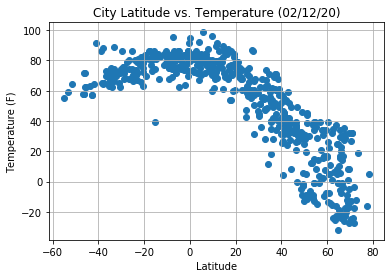

In [9]:
plt.scatter(city_df['Latitude'], city_df['Max Temp'])
plt.title(f"City Latitude vs. Temperature ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.savefig('lat_temp.png', bbox_inches='tight')

#The graph is showing how max temperature changes based on the latitude of a location, the higher the latitutde
# the lower the max temp and vice versa. 

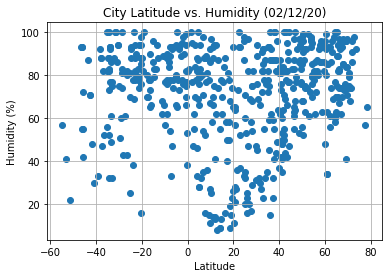

In [10]:
plt.scatter(city_df['Latitude'], city_df['Humidity'])
plt.title(f"City Latitude vs. Humidity ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('lat_humid.png', bbox_inches='tight')

# The graph shows the comparison between latitude and humidity, there isn't too much to say based on this graph
# latitue has no effect on humidity 

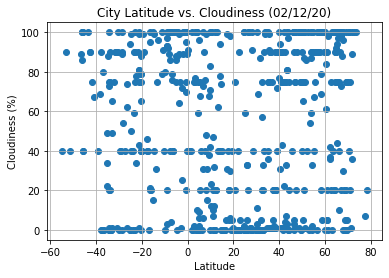

In [11]:
plt.scatter(city_df['Latitude'], city_df['Cloudiness'])
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('lat_cloud.png', bbox_inches='tight')

# The graph is showing cloudiness levels in different locations, again there isnt much of a comparison between latitude
# and cloudiness level 

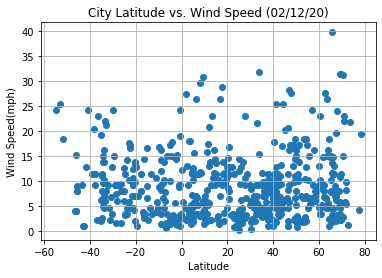

In [12]:
plt.scatter(city_df['Latitude'], city_df['Wind Speed'])
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.grid(True)
plt.savefig('lat_wind.png', bbox_inches='tight')

# The graph seems to be showng that places with higher latitude have lower wind speeds, but wind speeds in all locations
# seems to be about the same 

In [13]:
Northern_lat = [0,10,20,30,40,50,60,70,80]
Southern_lat = [-60,-50,-40,-30,-20,-10,0]

C:\Users\stacy\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\stacy\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\stacy\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


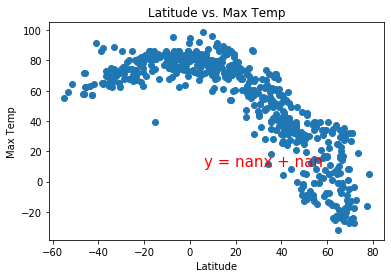

In [14]:
x_values = city_df['Latitude']
y_values = city_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Latitude vs. Max Temp")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

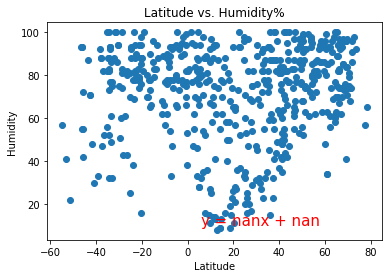

In [15]:
x_values = city_df['Latitude'].astype("float")
y_values = city_df['Humidity'].astype("float")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title(f"Latitude vs. Humidity%")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

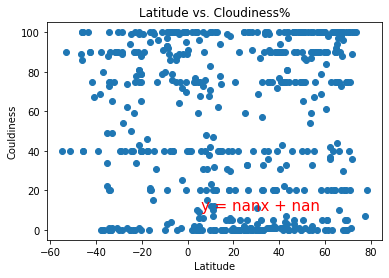

In [16]:
x_values = city_df['Latitude'].astype("float")
y_values = city_df['Cloudiness'].astype("float")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title(f"Latitude vs. Cloudiness%")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Couldiness')
plt.show()

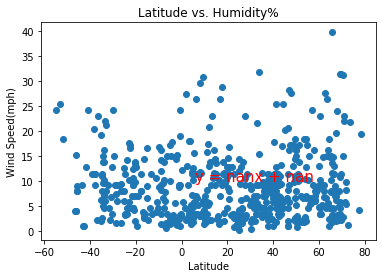

In [17]:
x_values = city_df['Latitude'].astype("float")
y_values = city_df['Wind Speed'].astype("float")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title(f"Latitude vs. Humidity%")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.show()

In [18]:
output_data_file = os.path.join("..", "output_data", "city_df.csv")